In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
data=pd.read_csv("olympics2024.csv")
data.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [5]:
data.isnull().sum()

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [6]:
data.columns

Index(['Rank', 'Country', 'Country Code', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

In [7]:
data["Rank"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35,
       36, 37, 39, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 55, 59, 60, 62,
       64, 65, 66, 68, 70, 71, 72, 73, 74, 79, 80, 84], dtype=int64)

In [8]:
data["Country"].unique()

array(['United States', 'China', 'Japan', 'Australia', 'France',
       'Netherlands', 'Great Britain', 'South Korea', 'Italy', 'Germany',
       'New Zealand', 'Canada', 'Uzbekistan', 'Hungary', 'Spain',
       'Sweden', 'Kenya', 'Norway', 'Ireland', 'Brazil', 'Iran',
       'Ukraine', 'Romania', 'Georgia', 'Belgium', 'Bulgaria', 'Serbia',
       'Czech Republic', 'Denmark', 'Azerbaijan', 'Croatia', 'Cuba',
       'Bahrain', 'Slovenia', 'Chinese Taipei', 'Austria', 'Hong Kong',
       'Philippines', 'Algeria', 'Indonesia', 'Israel', 'Poland',
       'Kazakhstan', 'Jamaica', 'South Africa', 'Thailand', 'Ethiopia',
       'Switzerland', 'Ecuador', 'Portugal', 'Greece', 'Argentina',
       'Egypt', 'Tunisia', 'Botswana', 'Chile', 'St Lucia', 'Uganda',
       'Dominican Republic', 'Guatemala', 'Morocco', 'Dominica',
       'Pakistan', 'Turkey', 'Mexico', 'Armenia', 'Colombia',
       'North Korea', 'Kyrgyzstan', 'Lithuania', 'India', 'Moldova',
       'Kosovo', 'Cyprus', 'Fiji', 'Jordan',

In [9]:
data["Country Code"].unique()

array(['US', 'CHN', 'JPN', 'AUS', 'FRA', 'NED', 'GBG', 'KOR', 'ITA',
       'GER', 'NZ', 'CAN', 'UZB', 'HUN', 'SPA', 'SWE', 'KEN', 'NOR',
       'IRE', 'BRZ', 'IRN', 'UKR', 'ROM', 'GEO', 'BEL', 'BUL', 'SER',
       'CZE', 'DEN', 'AZE', 'CRO', 'CUB', 'BHR', 'SLO', 'TPE', 'AUT',
       'HK', 'PHI', 'ALG', 'IDN', 'ISR', 'POL', 'KAZ', 'JAM', 'SA', 'THA',
       'ETH', 'SWI', 'ECU', 'POR', 'GRE', 'ARG', 'EGY', 'TUN', 'BOT',
       'CHI', 'LCA', 'UGA', 'DOM', 'GUA', 'MOR', 'DMA', 'PKN', 'TUR',
       'MEX', 'ARM', 'COL', 'PRK', 'KGZ', 'LTU', 'IND', 'MDA', 'KOS',
       'CYP', 'FIJ', 'JOR', 'MGL', 'PAN', 'TJK', 'ALB', 'GRN', 'MAS',
       'PUR', 'CPV', 'CIV', 'EOR', 'PER', 'QAT', 'SIN', 'SVK', 'ZAM'],
      dtype=object)

In [10]:
discrete_categorical=["Country","Country Code"]
discrete_count=["Gold","Silver","Bronze","Total","Rank"]

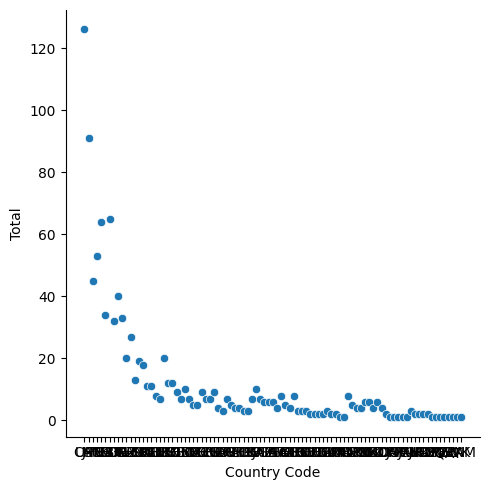

In [11]:
sns.relplot(x=data["Country Code"],y=data["Total"])
plt.show()

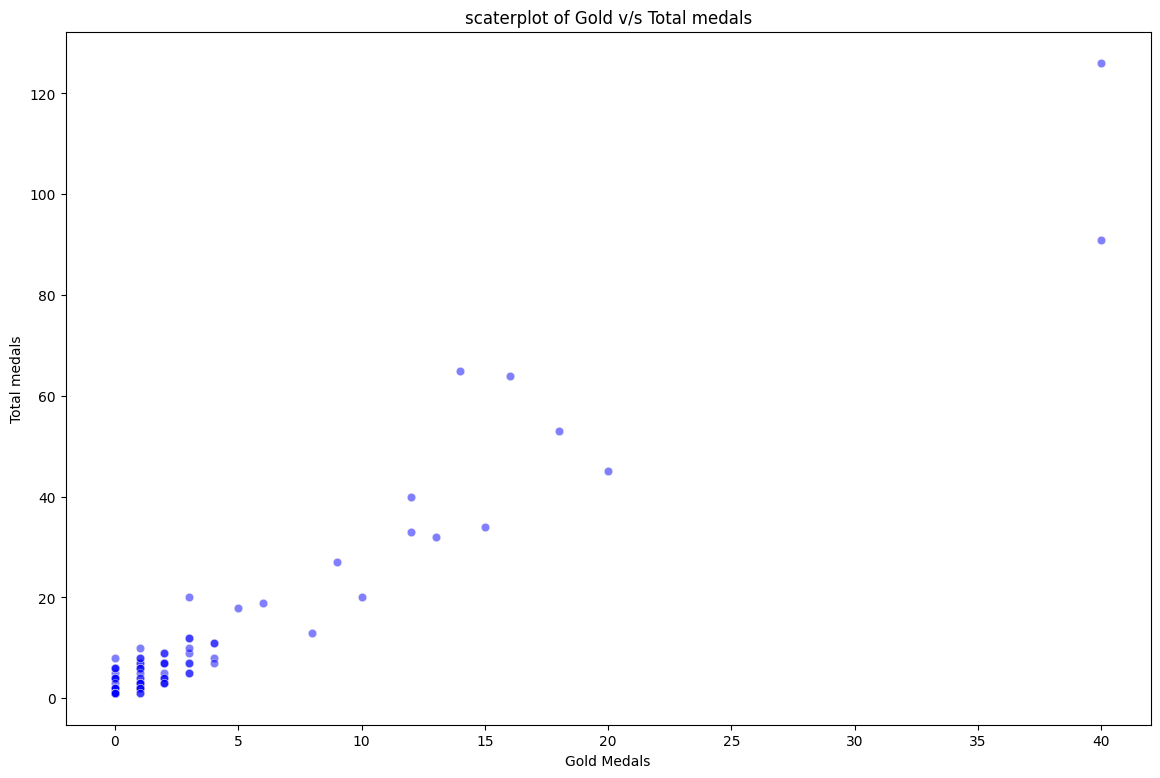

In [54]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=data,x="Gold",y="Total",color="blue",edgecolor="linen",alpha=0.5)
plt.title("scaterplot of Gold v/s Total medals")
plt.xlabel("Gold Medals")
plt.ylabel("Total medals")
plt.show()

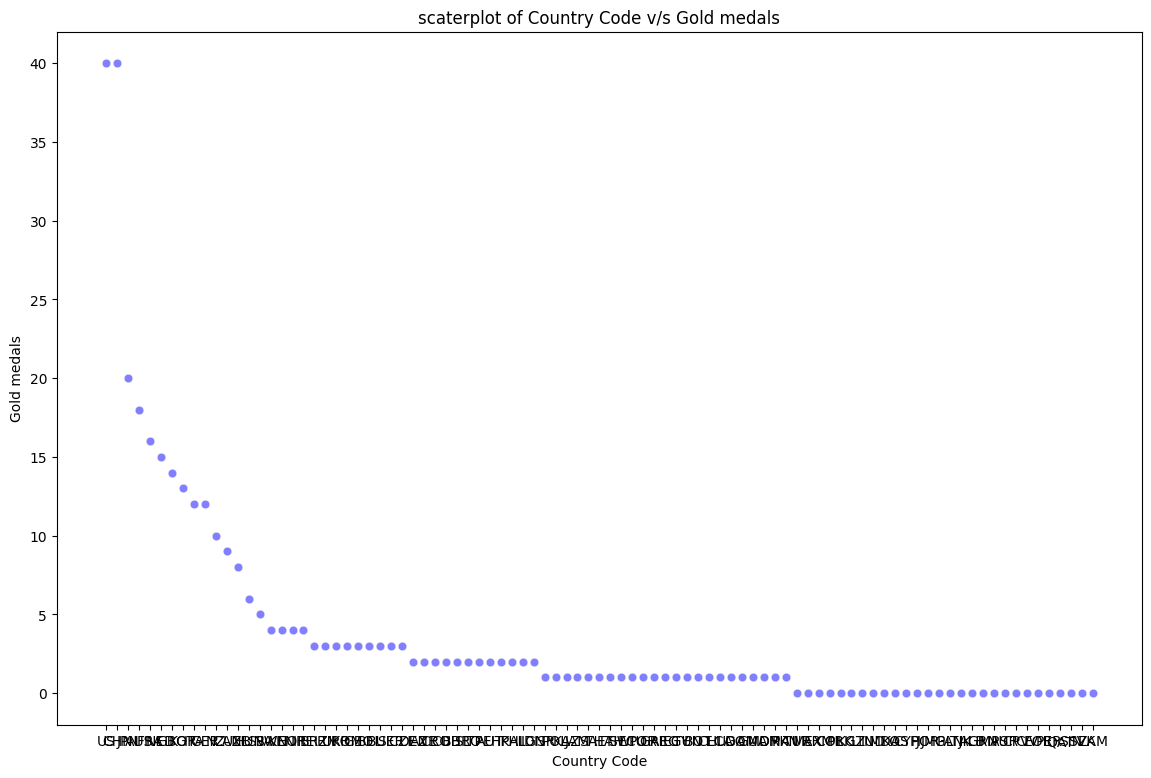

In [13]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=data,x="Country Code",y="Gold",color="blue",edgecolor="linen",alpha=0.5)
plt.title("scaterplot of Country Code v/s Gold medals")
plt.xlabel("Country Code")
plt.ylabel("Gold medals")
plt.show()

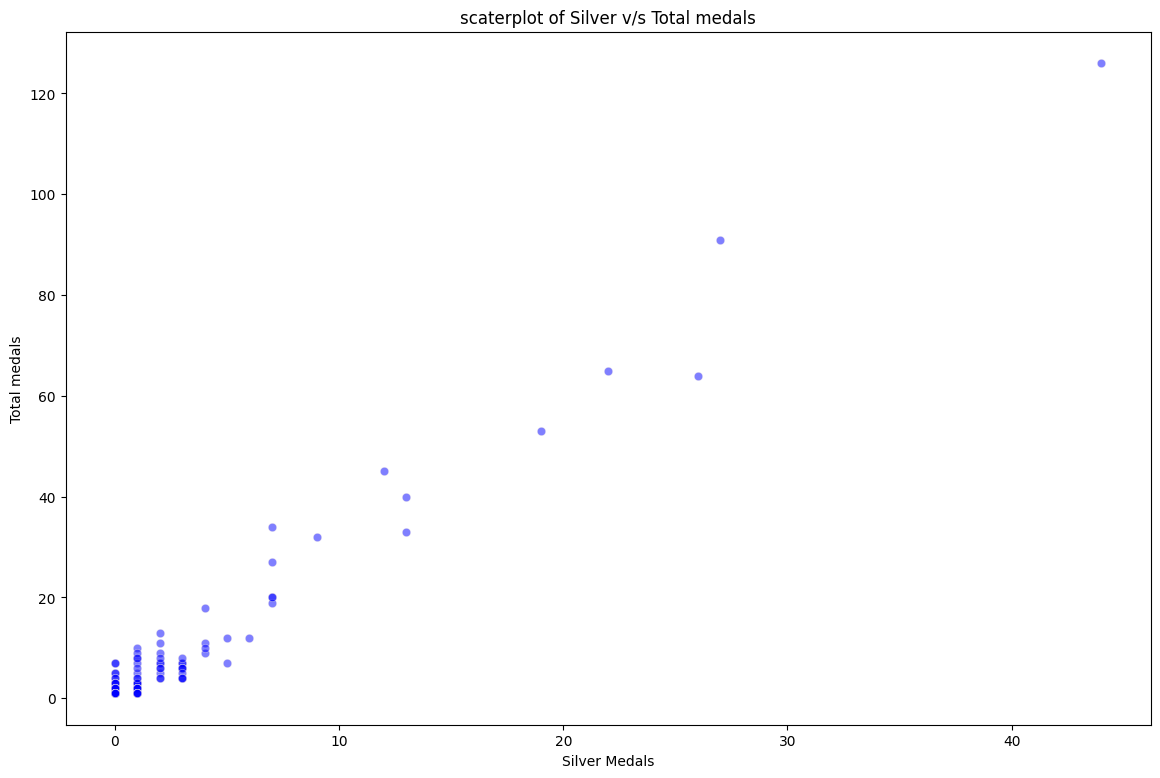

In [55]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=data,x="Silver",y="Total",color="blue",edgecolor="linen",alpha=0.5)
plt.title("scaterplot of Silver v/s Total medals")
plt.xlabel("Silver Medals")
plt.ylabel("Total medals")
plt.show()

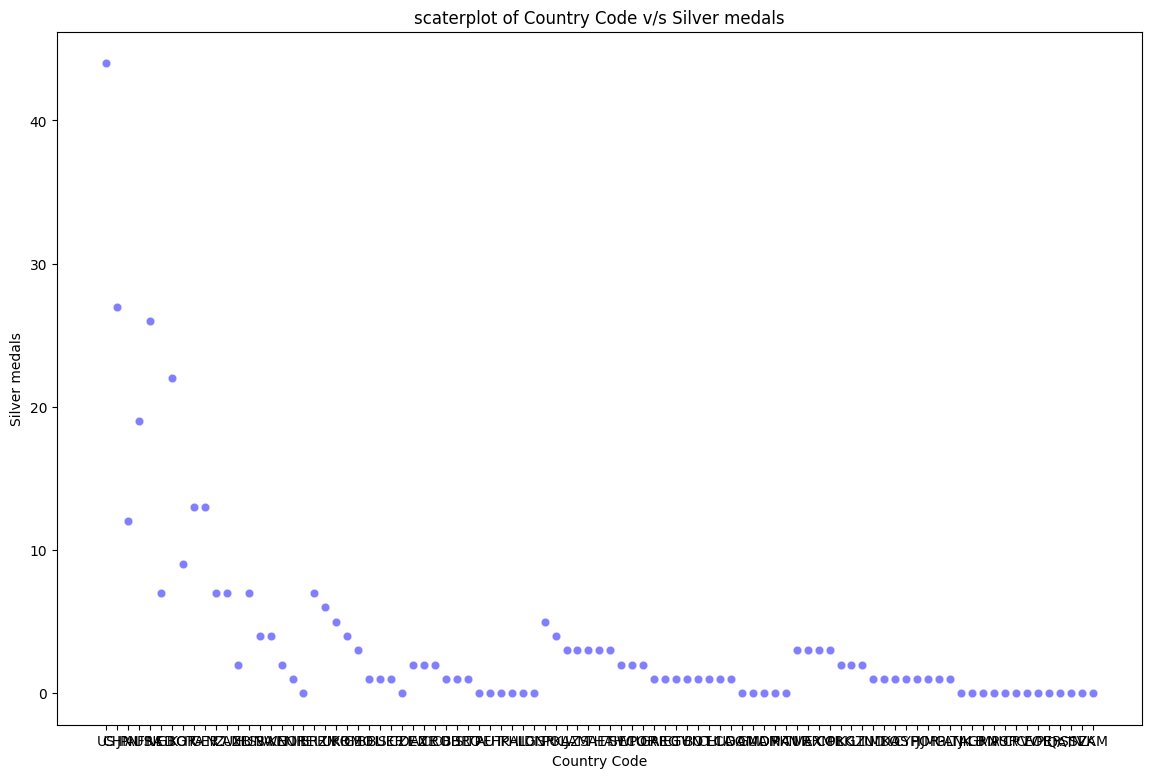

In [14]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=data,x="Country Code",y="Silver",color="blue",edgecolor="linen",alpha=0.5)
plt.title("scaterplot of Country Code v/s Silver medals")
plt.xlabel("Country Code")
plt.ylabel("Silver medals")
plt.show()

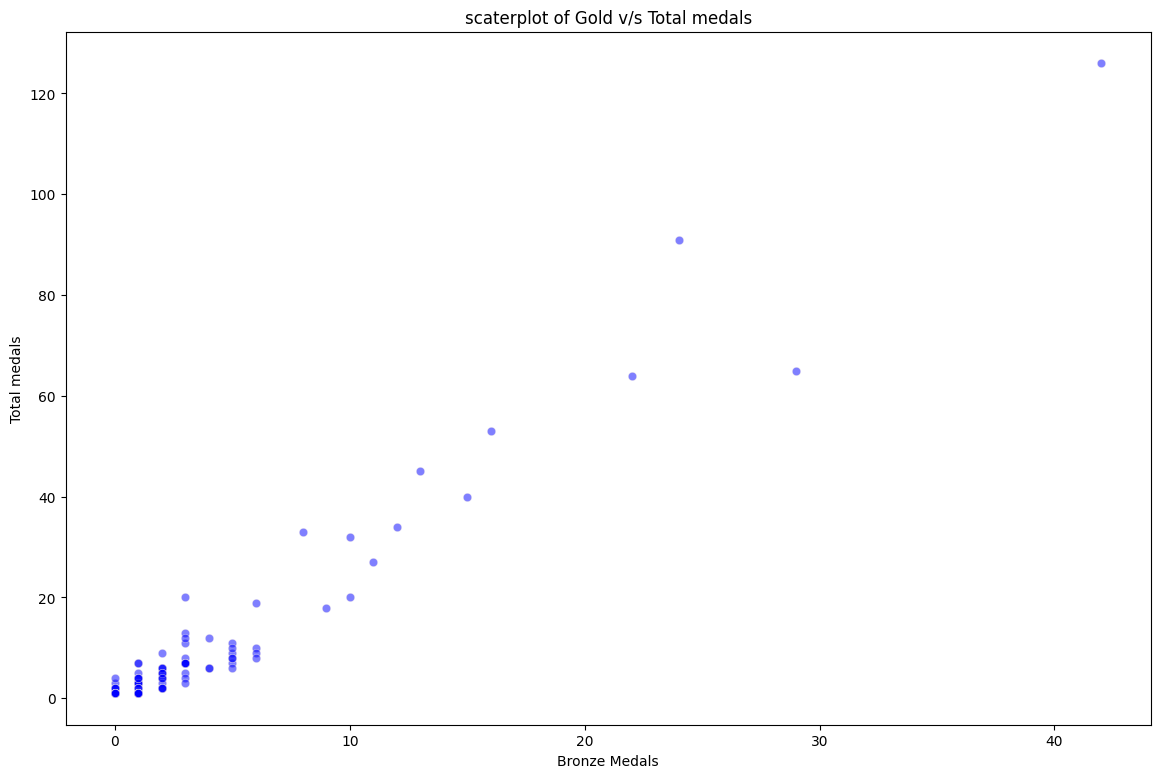

In [56]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=data,x="Bronze",y="Total",color="blue",edgecolor="linen",alpha=0.5)
plt.title("scaterplot of Gold v/s Total medals")
plt.xlabel("Bronze Medals")
plt.ylabel("Total medals")
plt.show()

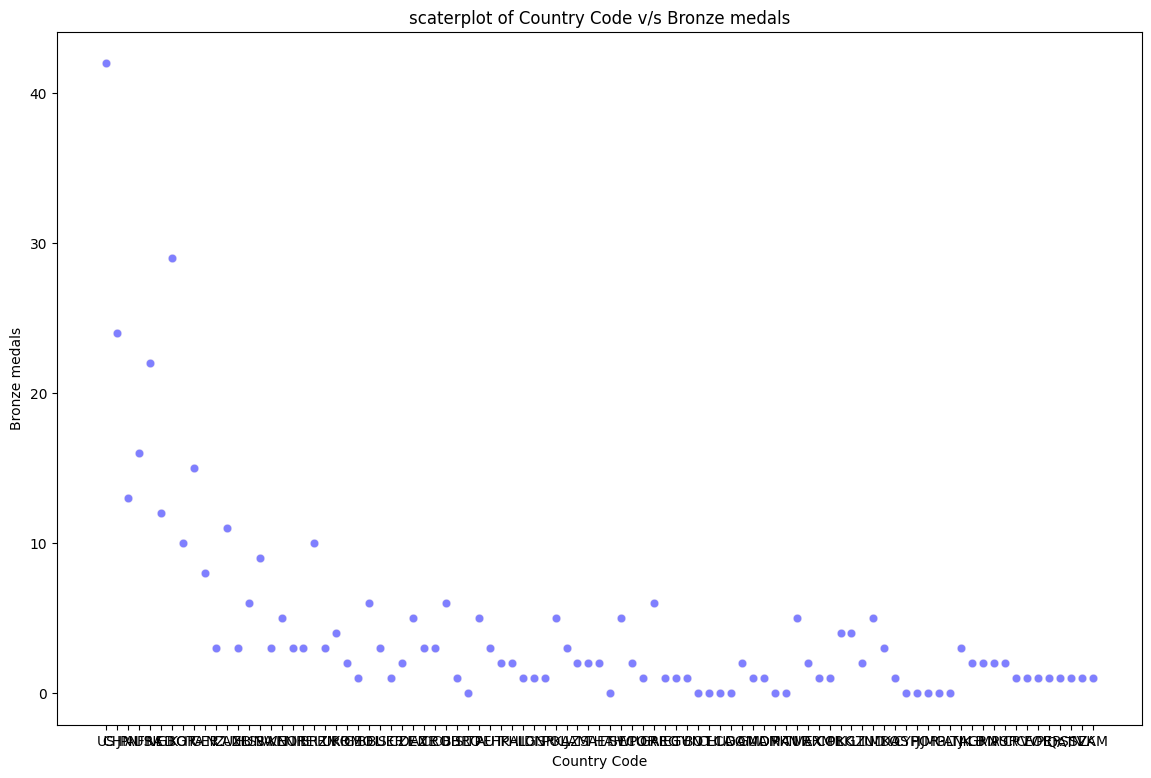

In [15]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=data,x="Country Code",y="Bronze",color="blue",edgecolor="linen",alpha=0.5)
plt.title("scaterplot of Country Code v/s Bronze medals")
plt.xlabel("Country Code")
plt.ylabel("Bronze medals")
plt.show()

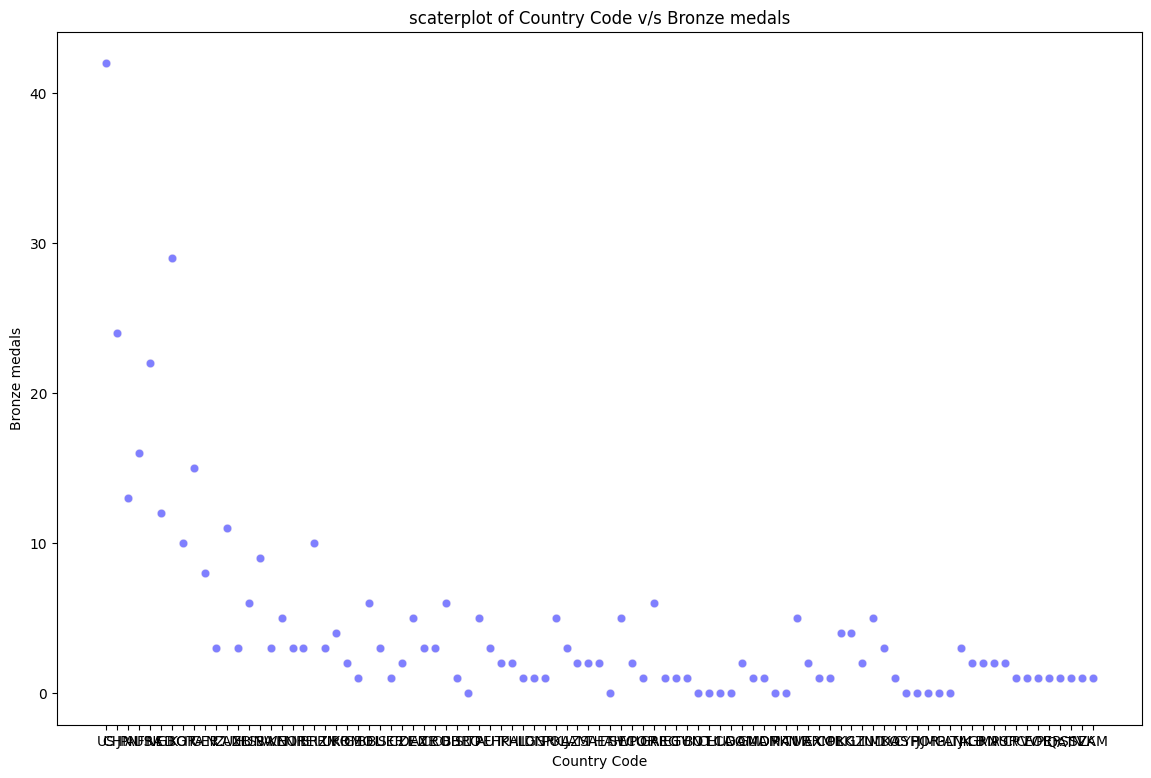

In [16]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=data,x="Country Code",y="Bronze",color="blue",edgecolor="linen",alpha=0.5)
plt.title("scaterplot of Country Code v/s Bronze medals")
plt.xlabel("Country Code")
plt.ylabel("Bronze medals")
plt.show()

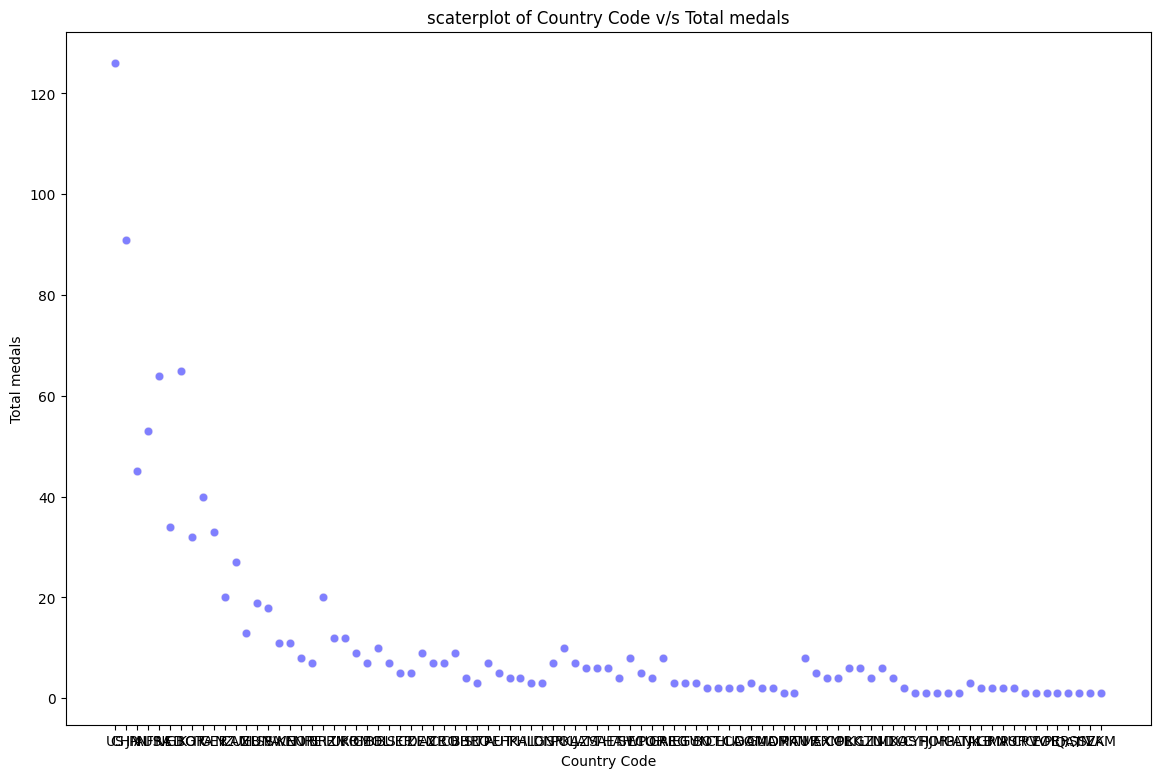

In [17]:
plt.figure(figsize=(14,9))

sns.scatterplot(data=data,x="Country Code",y="Total",color="blue",edgecolor="linen",alpha=0.5)
plt.title("scaterplot of Country Code v/s Total medals")
plt.xlabel("Country Code")
plt.ylabel("Total medals")
plt.show()

In [18]:
data[discrete_count].skew()

Gold      3.628194
Silver    3.693634
Bronze    3.442416
Total     3.622779
Rank     -0.047800
dtype: float64

In [ ]:

#THIS IS HOW I REMOVE OUTLIERS BUT I CHOSE NOT TO,BECAUSE DATA IS IMPORTANT


In [19]:
def plot_boxplot(data,ft):
    data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [20]:
def outliers(data,ft):
    Q1=data[ft].quantile(0.25)
    Q3=data[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    ls=data.index[ (data[ft] < lower_bound) | (data[ft]> upper_bound) ]

    return ls

In [21]:
index_list=[]
for feature in ["Gold","Silver","Bronze","Total","Rank"]:
    index_list.extend(outliers(data,feature))
index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 19]

In [ ]:

#LINEAR REGRESSION MODEL


In [22]:
data.drop(columns=["Country Code"],inplace=True)
data.drop(columns=["Country"],inplace=True)

In [23]:
X=data.drop("Total",axis=1)
y=data["Total"]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
print("Intercept:",model1.intercept_)
print("coefficients:",model1.coef_)

train_predictions=model1.predict(X_train)
test_predictions=model1.predict(X_test)

print("Train R2:",model1.score(X_train,y_train))
print("Test R2:",model1.score(X_test,y_test))
print("cross validation score:",cross_val_score(model1,X,y,cv=5).mean())

Intercept: 3.730349362740526e-14
coefficients: [-5.80894812e-16  1.00000000e+00  1.00000000e+00  1.00000000e+00]
Train R2: 1.0
Test R2: 1.0
cross validation score: 1.0


In [ ]:

#LASSO REGRESSION


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [26]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
estimator=Lasso()
param_grid={"alpha":list(range(1,100))}

model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [27]:
from sklearn.linear_model import Lasso
lasso_best=Lasso(alpha=1)
lasso_best.fit(X_train,y_train)

print("Intercept:",lasso_best.intercept_)
print("coefficients:",lasso_best.coef_)

ypred_train=lasso_best.predict(X_train)
from sklearn.metrics import r2_score
print("train r2:",r2_score(y_train,ypred_train))
from sklearn.model_selection import cross_val_score
print("Cv score:",cross_val_score(lasso_best,X_train,y_train,cv=5).mean())

ypred_test=lasso_best.predict(X_test)
print("test r2:",r2_score(y_test,ypred_test))

Intercept: 0.2880244938044516
coefficients: [-0.00356108  0.98641802  1.00170332  0.98293994]
train r2: 0.9999433941541173
Cv score: 0.9998964525362256
test r2: 0.9999240322529275


In [ ]:

#RIDGE REGRESSION


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
estimator=Ridge()

param_grid={"alpha":list(range(1,100))}

model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [29]:
ridge_best=Ridge(alpha=1)
ridge_best.fit(X_train,y_train)

print("intercept:",ridge_best.intercept_)
print("coefficients:",ridge_best.coef_)

ypred_train=ridge_best.predict(X_train)
print("train r2:",r2_score(y_train,ypred_train))
print("cv Score:",cross_val_score(ridge_best,X_train,y_train,cv=5).mean())

ypred_test=ridge_best.predict(X_test)
print("test r2:",r2_score(y_test,ypred_test))

intercept: 0.0058278158287272674
coefficients: [-8.47430336e-05  9.99691774e-01  1.00010596e+00  9.99719400e-01]
train r2: 0.9999999848061293
cv Score: 0.9999999208082782
test r2: 0.9999999839363857


In [ ]:

#ELASICT NET REGRESSION


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

from sklearn.linear_model import ElasticNet
enr_base=ElasticNet()
enr_base.fit(X_train,y_train)

train_predictions=enr_base.predict(X_train)
test_predictions=enr_base.predict(X_test)

print("train R2:",enr_base.score(X_train,y_train))
print("test R2:",enr_base.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross Validation Score:",cross_val_score(enr_base,X,y,cv=5).mean())

train R2: 0.9999353053339487
test R2: 0.999904428404989
cross Validation Score: 0.8717795624062488


In [31]:
from sklearn.model_selection import GridSearchCV

estimator=ElasticNet()

param_grid={"alpha":[0.1,0.2,1,2,3,5,10],"l1_ratio":[0.1,0.5,0.75,0.9,0.95,1]}

model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [32]:
enr_best=ElasticNet(alpha=0.1,l1_ratio=1)
enr_best.fit(X_train,y_train)

print("intercept:",enr_best.intercept_)
print("coefficients",enr_best.coef_)

train_predictions=enr_best.predict(X_train)
test_predictions=enr_best.predict(X_test)

print("Train R2:",enr_best.score(X_train,y_train))
print("test R2:",enr_best.score(X_test,y_test))
print("cross validation score:",cross_val_score(enr_best,X,y,cv=5).mean())

intercept: 0.030539367388508154
coefficients [-3.84250608e-04  9.98160626e-01  1.00072022e+00  9.98148165e-01]
Train R2: 0.9999994062955829
test R2: 0.9999992020762672
cross validation score: 0.938415762870027


In [ ]:

#POLYNOMIAL REGRESSION MODEL


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2)
X_train_poly=pd.DataFrame(polynomial_converter.fit_transform(X_train))

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_poly,y_train)

ypred_train=model.predict(X_train_poly)

from sklearn.metrics import mean_squared_error,r2_score
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(model,X_train_poly,y_train,cv=5).mean())


Train RMSE: 1.5040017021420707e-13
Train R2: 1.0
Cross Validation Score: 1.0


In [35]:
X_test_poly=pd.DataFrame(polynomial_converter.transform(X_test))

ypred_test=model.predict(X_test_poly)

print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",r2_score(y_test,ypred_test))

Test RMSE: 1.187531612267308e-13
Test R2: 1.0


In [36]:
train_r2=[]
test_r2=[]

for i in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=i)
    X_train_poly=pd.DataFrame(polynomial_converter.fit_transform(X_train))

    model=LinearRegression()
    model.fit(X_train_poly,y_train)

    train_pred=model.predict(X_train_poly)
    train_r2.append(model.score(X_train_poly,y_train))

    X_test_poly=pd.DataFrame(polynomial_converter.transform(X_test))

    test_pred=model.predict(X_test_poly)
    test_r2.append(model.score(X_test_poly,y_test))

In [37]:
train_r2

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [38]:
test_r2

[1.0,
 1.0,
 1.0,
 -109.54238752313594,
 -1546.1717509140542,
 -993.6469511483222,
 -20786.66519838719,
 -52326.92830920702,
 -26781.026071231016]

In [50]:

final_poly_converter=PolynomialFeatures(degree=1)
X_train_poly=pd.DataFrame(final_poly_converter.fit_transform(X_train))

final_model=LinearRegression()
final_model.fit(X_train_poly,y_train)

train_pred=final_model.predict(X_train_poly)
print("train R2:",final_model.score(X_train_poly,y_train))
print("Cross validation score:",cross_val_score(model,X_train_poly,y_train,cv=5).mean())

X_test_poly=pd.DataFrame(final_poly_converter.transform(X_test))
test_pred=final_model.predict(X_test_poly)
print("test R2:",final_model.score(X_test_poly,y_test))

train R2: 1.0
Cross validation score: 1.0
test R2: 1.0


In [ ]:



#ANN MODEL




In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [42]:
from keras.models import Sequential
from keras.layers import Dense

In [43]:
def ann_model_regressor():
    
    model=Sequential()

    model.add(Dense(input_dim=4,units=6,activation="relu",kernel_initializer="uniform"))

    model.add(Dense(units=6,activation="relu",kernel_initializer="uniform"))

    model.add(Dense(units=1,activation="relu",kernel_intitializer="uniform"))

    model.compile(optimizer="adam",loss="mean_squared_error")

    return model

In [44]:
def ann_model_regressor():
    model=Sequential()
    model.add(Dense(input_dim=4,units=6,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=6,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=1,activation="relu",kernel_initializer="uniform"))
    model.compile(optimizer="adam",loss="mean_squared_error")
    return model

In [45]:
ann=ann_model_regressor()

In [46]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 516.7130  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 463.3261 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 500.7917 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 655.3377 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 479.4045 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 579.0216 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 752.7376  
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 649.6647 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 576.7744 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 463.0134 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 506.6788 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 559.7272 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 638.4830 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 716.9870  
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [47]:
ypred_train=ann.predict(X_train)
ypred_test=ann.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [48]:
from sklearn.metrics import mean_squared_error
print("MSE for train data:",mean_squared_error(y_train,ypred_train))
print("MSE for test data:",mean_squared_error(y_test,ypred_test))

MSE for train data: 327.6505232064575
MSE for test data: 146.85424014849255


In [49]:
from sklearn.metrics import r2_score
print("R2 for train data ",r2_score(y_train,ypred_train))
print("R2 for test data: ",r2_score(y_test,ypred_test))

R2 for train data  0.2574011921948418
R2 for test data:  0.11956719876431043


In [ ]:



#SO THE BEST MODELS ARE LINEAR REGRESSION AND POLYNOMIAL REGRESSION





In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
print("Intercept:",model1.intercept_)
print("coefficients:",model1.coef_)

train_predictions=model1.predict(X_train)
test_predictions=model1.predict(X_test)

print("Train R2:",model1.score(X_train,y_train))
print("Test R2:",model1.score(X_test,y_test))
print("cross validation score:",cross_val_score(model1,X,y,cv=5).mean())

Intercept: 3.730349362740526e-14
coefficients: [-5.80894812e-16  1.00000000e+00  1.00000000e+00  1.00000000e+00]
Train R2: 1.0
Test R2: 1.0
cross validation score: 1.0


In [52]:

final_poly_converter=PolynomialFeatures(degree=1)
X_train_poly=pd.DataFrame(final_poly_converter.fit_transform(X_train))

final_model=LinearRegression()
final_model.fit(X_train_poly,y_train)

train_pred=final_model.predict(X_train_poly)
print("train R2:",final_model.score(X_train_poly,y_train))
print("Cross validation score:",cross_val_score(model,X_train_poly,y_train,cv=5).mean())

X_test_poly=pd.DataFrame(final_poly_converter.transform(X_test))
test_pred=final_model.predict(X_test_poly)
print("test R2:",final_model.score(X_test_poly,y_test))

train R2: 1.0
Cross validation score: 1.0
test R2: 1.0
